<a href="https://colab.research.google.com/github/Viky98/TheMcguffin/blob/main/Week_7_A_3_Third_Research_Programming_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries and Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import numpy as np

# Load AG News dataset
(train_data, test_data), info = tfds.load('ag_news_subset', split=['train', 'test'], as_supervised=True, with_info=True)

# Constants
VOCAB_SIZE = 10000
OUTPUT_SEQUENCE_LENGTH = 128

# Preprocess text data
train_texts = [data[0].numpy().decode('utf-8') for data in train_data]
test_texts = [data[0].numpy().decode('utf-8') for data in test_data]

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)  # Apply tokenizer on train texts

train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
train_labels = np.array([data[1].numpy() for data in train_data])
test_labels = np.array([data[1].numpy() for data in test_data])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteGWJBJM/ag_news_subset-train.tfrecord*...:  …

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteGWJBJM/ag_news_subset-test.tfrecord*...:   …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


# Step 2: Experiment A - EDA and Vocabulary Manipulation

Number of classes/topics in the dataset: 4
Number of documents in each class:
Class 3: 30000 documents
Class 1: 30000 documents
Class 2: 30000 documents
Class 0: 30000 documents


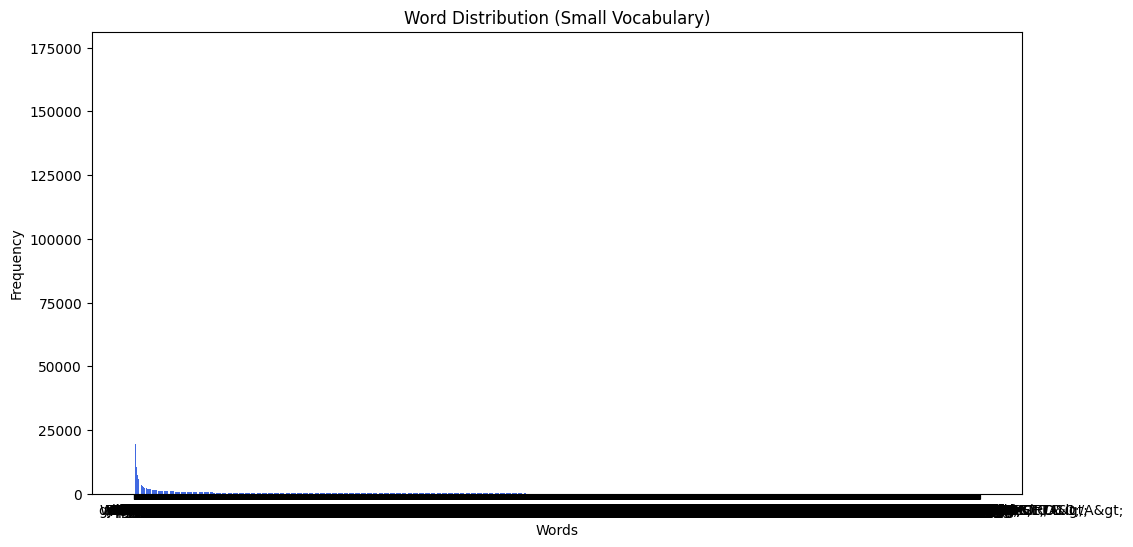

In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# EDA: Number of classes/topics in the dataset
num_classes = info.features['label'].num_classes
print(f"Number of classes/topics in the dataset: {num_classes}")

# EDA: Number of documents in each class
class_distribution = Counter(train_labels)
print("Number of documents in each class:")
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} documents")

# Vocabulary Size Experiment
def plot_word_distribution(texts, title):
    # Tokenize and count words
    words = [word for text in texts for word in text.split()]
    word_counter = Counter(words)

    # Plot word distribution
    plt.figure(figsize=(12, 6))
    plt.bar(*zip(*word_counter.most_common(VOCAB_SIZE)), color='royalblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Vocabulary Size Experiment: Small
plot_word_distribution(train_texts, "Word Distribution (Small Vocabulary)")

## Experimenting with different vocabulary sizes and editing the vocabulary (removing stopwords)

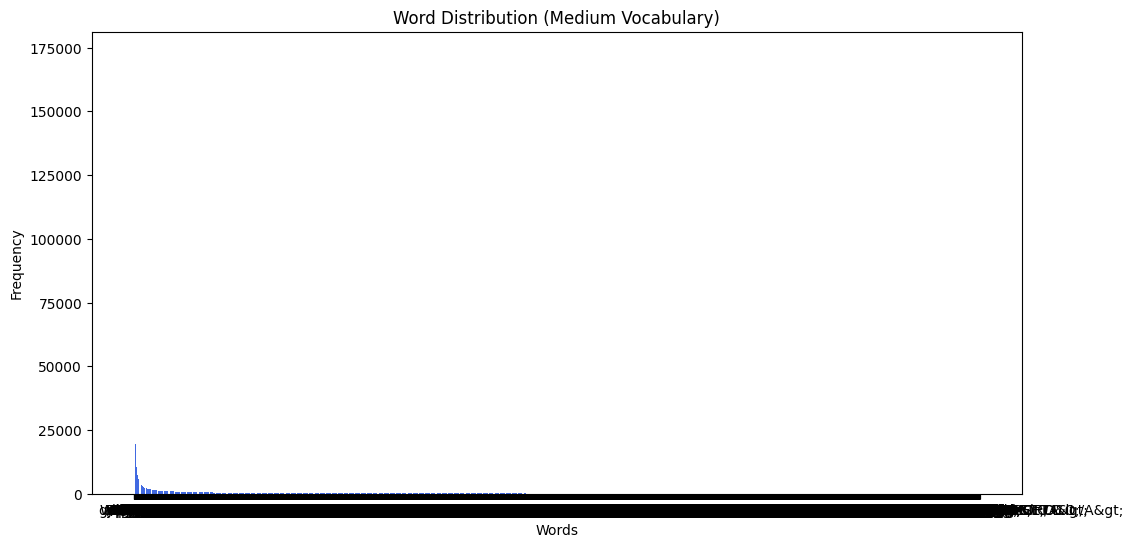

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


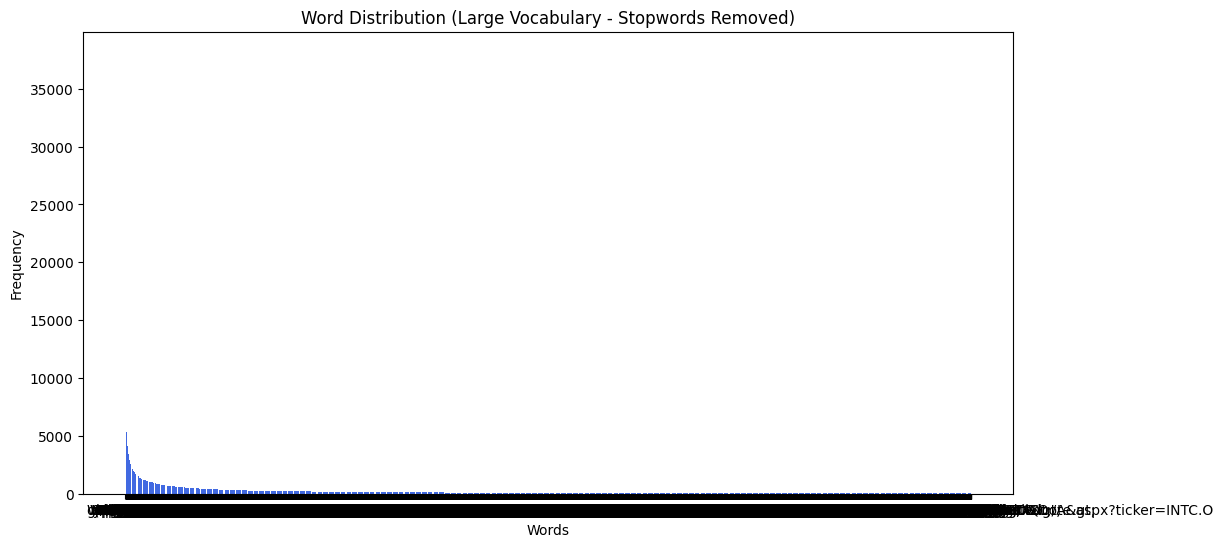

In [ ]:
# Vocabulary Size Experiment: Medium
VOCAB_SIZE_MEDIUM = 5000  # Adjust as needed
tokenizer_medium = Tokenizer(num_words=VOCAB_SIZE_MEDIUM, oov_token='<OOV>')
tokenizer_medium.fit_on_texts(train_texts)
plot_word_distribution(train_texts, "Word Distribution (Medium Vocabulary)")

# Vocabulary Editing: Removing Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_texts = [" ".join([word for word in text.split() if word.lower() not in stop_words]) for text in train_texts]

# Vocabulary Size Experiment: Large (edited to exclude stopwords)
VOCAB_SIZE_LARGE = 20000  # Adjust as needed
tokenizer_large = Tokenizer(num_words=VOCAB_SIZE_LARGE, oov_token='<OOV>')
tokenizer_large.fit_on_texts(filtered_texts)
plot_word_distribution(filtered_texts, "Word Distribution (Large Vocabulary - Stopwords Removed)")


## Text Length Analysis

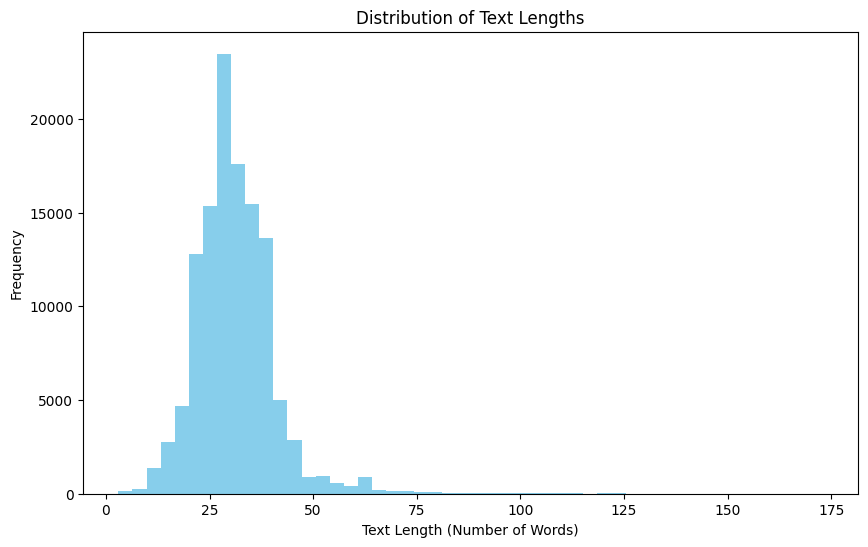

In [ ]:
# Analyze text lengths
text_lengths = [len(text.split()) for text in train_texts]

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()


## Word Cloud Visualization

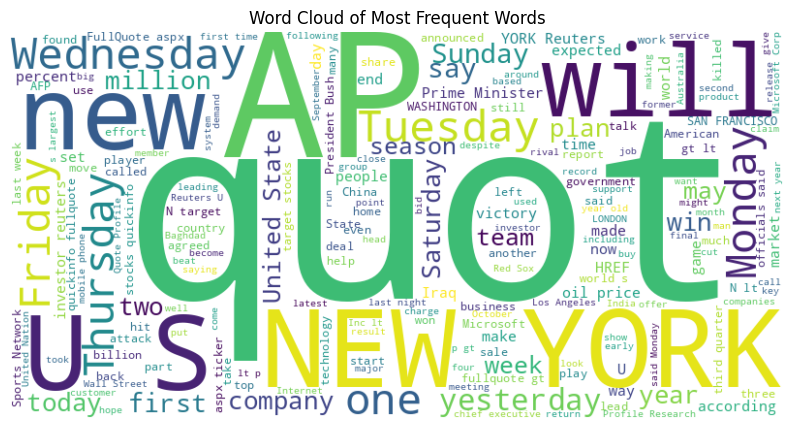

In [ ]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_texts))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Most Frequent Words")
plt.axis("off")
plt.show()


## Lemmatization and Stemming

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Apply lemmatization and stemming to a sample text
sample_text = "running jumping talked"
lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in sample_text.split()])
stemmed_text = ' '.join([stemmer.stem(word) for word in sample_text.split()])

print("Original Text:", sample_text)
print("Lemmatized Text:", lemmatized_text)
print("Stemmed Text:", stemmed_text)


Original Text: running jumping talked
Lemmatized Text: running jumping talked
Stemmed Text: run jump talk


## Vocabulary Size (a): Tweak the Vocabulary Size

In [ ]:
# Vocabulary Size Experiment: Small
VOCAB_SIZE_SMALL = 5000  # Adjust as needed
tokenizer_small = Tokenizer(num_words=VOCAB_SIZE_SMALL, oov_token='<OOV>')
tokenizer_small.fit_on_texts(train_texts)
train_sequences_small = tokenizer_small.texts_to_sequences(train_texts)
train_padded_small = pad_sequences(train_sequences_small, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

# Vocabulary Size Experiment: Medium
VOCAB_SIZE_MEDIUM = 10000  # Adjust as needed
tokenizer_medium = Tokenizer(num_words=VOCAB_SIZE_MEDIUM, oov_token='<OOV>')
tokenizer_medium.fit_on_texts(train_texts)
train_sequences_medium = tokenizer_medium.texts_to_sequences(train_texts)
train_padded_medium = pad_sequences(train_sequences_medium, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

# Vocabulary Size Experiment: Large
VOCAB_SIZE_LARGE = 20000  # Adjust as needed
tokenizer_large = Tokenizer(num_words=VOCAB_SIZE_LARGE, oov_token='<OOV>')
tokenizer_large.fit_on_texts(train_texts)
train_sequences_large = tokenizer_large.texts_to_sequences(train_texts)
train_padded_large = pad_sequences(train_sequences_large, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')


## Editing the Vocabulary (b): Unedited Most Frequent Words vs. Edit the List

In [ ]:
# Define a list of common stopwords to remove
stop_words = set(stopwords.words('english'))

# Unedited vocabulary
tokenizer_unedited = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer_unedited.fit_on_texts(train_texts)
train_sequences_unedited = tokenizer_unedited.texts_to_sequences(train_texts)
train_padded_unedited = pad_sequences(train_sequences_unedited, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

# Edited vocabulary (remove stopwords)
filtered_texts = [" ".join([word for word in text.split() if word.lower() not in stop_words]) for text in train_texts]
tokenizer_edited = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer_edited.fit_on_texts(filtered_texts)
train_sequences_edited = tokenizer_edited.texts_to_sequences(filtered_texts)
train_padded_edited = pad_sequences(train_sequences_edited, maxlen=OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')

train_padded_edited

array([[1454,    2,    3, ...,    0,    0,    0],
       [   6,  125,  106, ...,    0,    0,    0],
       [  31,  147,    2, ...,    0,    0,    0],
       ...,
       [   1,    1,    1, ...,    0,    0,    0],
       [ 251, 2884, 2161, ...,    0,    0,    0],
       [ 112,  487,  338, ...,    0,    0,    0]], dtype=int32)

## Output Sequence Length (c): Default vs. Fixed Number

In [ ]:
# Set output sequence length to a fixed number (e.g., 128 tokens)
FIXED_OUTPUT_SEQUENCE_LENGTH = 128

train_padded_fixed_length = pad_sequences(train_sequences, maxlen=FIXED_OUTPUT_SEQUENCE_LENGTH, padding='post', truncating='post')


# Step 3: Experiment B - RNN

In [ ]:
# RNN Model
model_rnn = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=OUTPUT_SEQUENCE_LENGTH),
    LSTM(128),
    Dense(4, activation='softmax')
])

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)

model_rnn.summary()

Epoch 1/10
960/960 [==============================] - 35s 30ms/step - loss: 1.3865 - accuracy: 0.2528 - val_loss: 1.3876 - val_accuracy: 0.2477
Epoch 2/10
960/960 [==============================] - 12s 12ms/step - loss: 1.3870 - accuracy: 0.2504 - val_loss: 1.3863 - val_accuracy: 0.2477
Epoch 3/10
960/960 [==============================] - 12s 13ms/step - loss: 1.3860 - accuracy: 0.2511 - val_loss: 1.3856 - val_accuracy: 0.2512
Epoch 4/10
960/960 [==============================] - 11s 12ms/step - loss: 1.0773 - accuracy: 0.4731 - val_loss: 0.6298 - val_accuracy: 0.7947
Epoch 5/10
960/960 [==============================] - 11s 11ms/step - loss: 0.4400 - accuracy: 0.8556 - val_loss: 0.3399 - val_accuracy: 0.8851
Epoch 6/10
960/960 [==============================] - 11s 12ms/step - loss: 0.2812 - accuracy: 0.9107 - val_loss: 0.3085 - val_accuracy: 0.8979
Epoch 7/10
960/960 [==============================] - 11s 11ms/step - loss: 0.2302 - accuracy: 0.9269 - val_loss: 0.2960 - val_accuracy:

## RNN with Bidirectional Layer and Dropout Regularization

In [ ]:
# RNN with Bidirectional Layer and Dropout Regularization
from tensorflow.keras.layers import Bidirectional, Dropout,SimpleRNN

model_rnn_bidirectional = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=OUTPUT_SEQUENCE_LENGTH),
    Bidirectional(SimpleRNN(128)),  # Bidirectional RNN layer
    Dropout(0.3),  # Dropout regularization
    Dense(num_classes, activation='softmax')
])

model_rnn_bidirectional.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn_bidirectional.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
960/960 [==============================] - 198s 203ms/step - loss: 0.5544 - accuracy: 0.7802 - val_loss: 0.3206 - val_accuracy: 0.8942
Epoch 2/10
960/960 [==============================] - 181s 188ms/step - loss: 0.2858 - accuracy: 0.9055 - val_loss: 0.3225 - val_accuracy: 0.8921
Epoch 3/10
960/960 [==============================] - 181s 188ms/step - loss: 0.2193 - accuracy: 0.9275 - val_loss: 0.3465 - val_accuracy: 0.8885
Epoch 4/10
960/960 [==============================] - 178s 186ms/step - loss: 0.1916 - accuracy: 0.9352 - val_loss: 0.4115 - val_accuracy: 0.8835
Epoch 5/10
960/960 [==============================] - 179s 186ms/step - loss: 0.1213 - accuracy: 0.9600 - val_loss: 0.4302 - val_accuracy: 0.8770
Epoch 6/10
960/960 [==============================] - 177s 185ms/step - loss: 0.0882 - accuracy: 0.9712 - val_loss: 0.4926 - val_accuracy: 0.8842
Epoch 7/10
960/960 [==============================] - 179s 187ms/step - loss: 0.0748 - accuracy: 0.9747 - val_loss: 0.5538 -

# Step 4: Experiment C - LSTM

In [ ]:
# LSTM Model
model_lstm = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=OUTPUT_SEQUENCE_LENGTH),
    Bidirectional(LSTM(128)),
    Dense(4, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
960/960 [==============================] - 41s 40ms/step - loss: 0.3824 - accuracy: 0.8658 - val_loss: 0.2853 - val_accuracy: 0.9041
Epoch 2/10
960/960 [==============================] - 20s 21ms/step - loss: 0.2319 - accuracy: 0.9208 - val_loss: 0.3077 - val_accuracy: 0.8957
Epoch 3/10
960/960 [==============================] - 20s 21ms/step - loss: 0.1937 - accuracy: 0.9323 - val_loss: 0.2926 - val_accuracy: 0.9059
Epoch 4/10
960/960 [==============================] - 19s 20ms/step - loss: 0.1634 - accuracy: 0.9429 - val_loss: 0.3127 - val_accuracy: 0.8985
Epoch 5/10
960/960 [==============================] - 19s 20ms/step - loss: 0.1316 - accuracy: 0.9536 - val_loss: 0.3230 - val_accuracy: 0.8983
Epoch 6/10
960/960 [==============================] - 19s 20ms/step - loss: 0.1081 - accuracy: 0.9616 - val_loss: 0.3698 - val_accuracy: 0.8939
Epoch 7/10
960/960 [==============================] - 18s 19ms/step - loss: 0.0851 - accuracy: 0.9703 - val_loss: 0.3835 - val_accuracy:

## Bidirectional LSTM with Regularization

In [ ]:
# Bidirectional LSTM with Dropout Regularization
model_lstm_bidirectional = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=OUTPUT_SEQUENCE_LENGTH),
    Bidirectional(LSTM(128)),  # Bidirectional LSTM layer
    Dropout(0.3),  # Dropout regularization
    Dense(num_classes, activation='softmax')
])

model_lstm_bidirectional.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm_bidirectional.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
960/960 [==============================] - 41s 39ms/step - loss: 0.3876 - accuracy: 0.8640 - val_loss: 0.2906 - val_accuracy: 0.9017
Epoch 2/10
960/960 [==============================] - 22s 23ms/step - loss: 0.2358 - accuracy: 0.9204 - val_loss: 0.2782 - val_accuracy: 0.9050
Epoch 3/10
960/960 [==============================] - 20s 21ms/step - loss: 0.1980 - accuracy: 0.9328 - val_loss: 0.2807 - val_accuracy: 0.9052
Epoch 4/10
960/960 [==============================] - 20s 21ms/step - loss: 0.1636 - accuracy: 0.9428 - val_loss: 0.2912 - val_accuracy: 0.9015
Epoch 5/10
960/960 [==============================] - 20s 21ms/step - loss: 0.1347 - accuracy: 0.9530 - val_loss: 0.3324 - val_accuracy: 0.8993
Epoch 6/10
960/960 [==============================] - 19s 20ms/step - loss: 0.1095 - accuracy: 0.9614 - val_loss: 0.3805 - val_accuracy: 0.8955
Epoch 7/10
960/960 [==============================] - 19s 20ms/step - loss: 0.0891 - accuracy: 0.9692 - val_loss: 0.3934 - val_accuracy:

# Step 5: Experiment D - 1D CNN

In [ ]:
# 1D CNN Model
model_cnn = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=OUTPUT_SEQUENCE_LENGTH),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPooling1D(),
    Dense(4, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
960/960 [==============================] - 32s 27ms/step - loss: 0.4086 - accuracy: 0.8629 - val_loss: 0.2870 - val_accuracy: 0.9020
Epoch 2/10
960/960 [==============================] - 9s 9ms/step - loss: 0.2130 - accuracy: 0.9280 - val_loss: 0.2803 - val_accuracy: 0.9044
Epoch 3/10
960/960 [==============================] - 6s 6ms/step - loss: 0.1409 - accuracy: 0.9529 - val_loss: 0.3099 - val_accuracy: 0.9013
Epoch 4/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.3551 - val_accuracy: 0.8992
Epoch 5/10
960/960 [==============================] - 6s 6ms/step - loss: 0.0439 - accuracy: 0.9887 - val_loss: 0.4136 - val_accuracy: 0.8974
Epoch 6/10
960/960 [==============================] - 7s 7ms/step - loss: 0.0298 - accuracy: 0.9929 - val_loss: 0.4584 - val_accuracy: 0.8980
Epoch 7/10
960/960 [==============================] - 6s 6ms/step - loss: 0.0248 - accuracy: 0.9944 - val_loss: 0.4784 - val_accuracy: 0.8983
Epoc

# Result:  Create a table with the accuracy and loss for train/test/validation & process time for all the models

In [ ]:
import pandas as pd
import time

# Define the model names and models
model_names = ["RNN (Simple)", "RNN (Bidirectional)", "LSTM (Simple)", "LSTM (Bidirectional"]
models = [model_rnn, model_rnn_bidirectional, model_lstm, model_lstm_bidirectional]

# Initialize lists to store model results
train_accuracy = []
test_accuracy_list = []
validation_accuracy = []
train_loss = []
test_loss_list = []
validation_loss = []
training_times = []

# Iterate over model names and models
for model_name, model in zip(model_names, models):
    start_time = time.time()
    history = model.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)
    end_time = time.time()
    training_times.append(end_time - start_time)
    train_accuracy.append(history.history['accuracy'][-1])
    test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)
    validation_accuracy.append(history.history['val_accuracy'][-1])
    validation_loss.append(history.history['val_loss'][-1])
    train_loss.append(history.history['loss'][-1])

# Create a data dictionary
data = {
    "Model": model_names,
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy_list,
    "Validation Accuracy": validation_accuracy,
    "Train Loss": train_loss,
    "Test Loss": test_loss_list,
    "Validation Loss": validation_loss,
    "Training Time (s)": training_times
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
df


Epoch 1/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.5953 - val_accuracy: 0.8871
Epoch 2/10
960/960 [==============================] - 13s 14ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.6288 - val_accuracy: 0.8856
Epoch 3/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.6330 - val_accuracy: 0.8867
Epoch 4/10
960/960 [==============================] - 11s 12ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.6367 - val_accuracy: 0.8863
Epoch 5/10
960/960 [==============================] - 11s 12ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.6936 - val_accuracy: 0.8879
Epoch 6/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.6327 - val_accuracy: 0.8866
Epoch 7/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.6772 - val_accuracy:

,Model,Train Accuracy,Test Accuracy,Validation Accuracy,Train Loss,Test Loss,Validation Loss,Training Time (s)
0,RNN (Simple),0.995885,0.881711,0.886042,0.012840,0.734123,0.697626,142.014786
1,RNN (Bidirectional),0.983240,0.865526,0.867458,0.051629,0.699691,0.685991,1822.019841
2,LSTM (Simple),0.997469,0.888158,0.890250,0.006442,0.836705,0.820058,202.008382
3,LSTM (Bidirectional,0.996844,0.885395,0.888083,0.007973,0.862320,0.824626,194.428879


# Compare the test set performance and training time for models that begin with one-hot encoding versus models that begin with word embeddings from a public-domain source (pre-trained word embeddings).

## Using One-Hot Encoding

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

EMBEDDING_DIM = 100  # Define the embedding dimension

# Build a model with one-hot encoding
model_onehot = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=OUTPUT_SEQUENCE_LENGTH),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the one-hot encoding model
model_onehot.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

start_time = time.time()
history_onehot = model_onehot.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2)
end_time = time.time()
training_time_onehot = end_time - start_time

# Evaluate the one-hot encoding model on the test set
test_loss_onehot, test_accuracy_onehot = model_onehot.evaluate(test_padded, test_labels)


Epoch 1/10
960/960 [==============================] - 35s 36ms/step - loss: 0.3834 - accuracy: 0.8608 - val_loss: 0.2650 - val_accuracy: 0.9078
Epoch 2/10
960/960 [==============================] - 9s 9ms/step - loss: 0.1618 - accuracy: 0.9450 - val_loss: 0.3029 - val_accuracy: 0.8978
Epoch 3/10
960/960 [==============================] - 6s 6ms/step - loss: 0.0528 - accuracy: 0.9847 - val_loss: 0.3814 - val_accuracy: 0.8960
Epoch 4/10
960/960 [==============================] - 6s 6ms/step - loss: 0.0226 - accuracy: 0.9954 - val_loss: 0.4417 - val_accuracy: 0.8961
Epoch 5/10
960/960 [==============================] - 5s 6ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.4800 - val_accuracy: 0.8950
Epoch 6/10
960/960 [==============================] - 5s 6ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.5122 - val_accuracy: 0.8945
Epoch 7/10
960/960 [==============================] - 5s 6ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.5872 - val_accuracy: 0.8942
Epoc

In [ ]:
# Compare test set performance and training time
print("Test Set Performance:")
print(f"One-Hot Encoding Model - Test Accuracy: {test_accuracy_onehot}, Test Loss: {test_loss_onehot}")
print("\nTraining Time:")
print(f"One-Hot Encoding Model - Training Time: {training_time_onehot} seconds")



Test Set Performance:
One-Hot Encoding Model - Test Accuracy: 0.887499988079071, Test Loss: 0.8594997525215149

Training Time:
One-Hot Encoding Model - Training Time: 85.15658950805664 seconds


# Visualizations. Employ visualizations to examine the performance of each network under study. Show training and validation set results (loss/cost and performance/accuracy) across epochs.

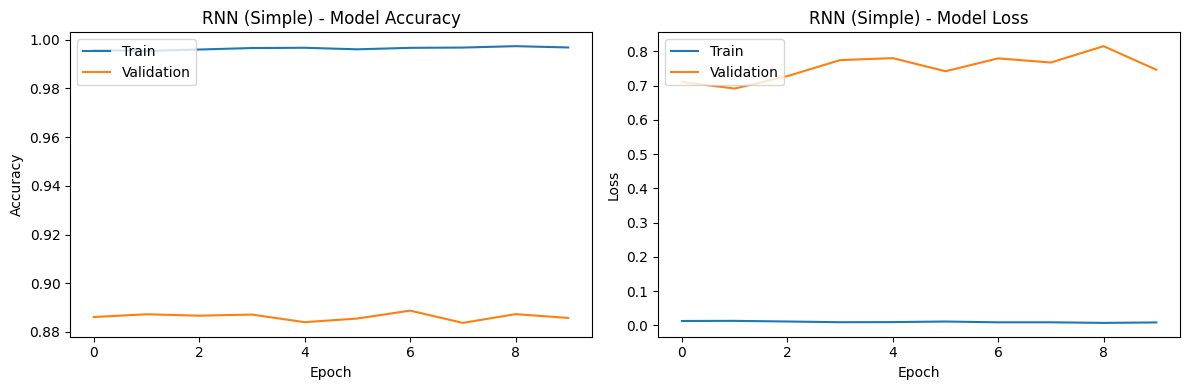

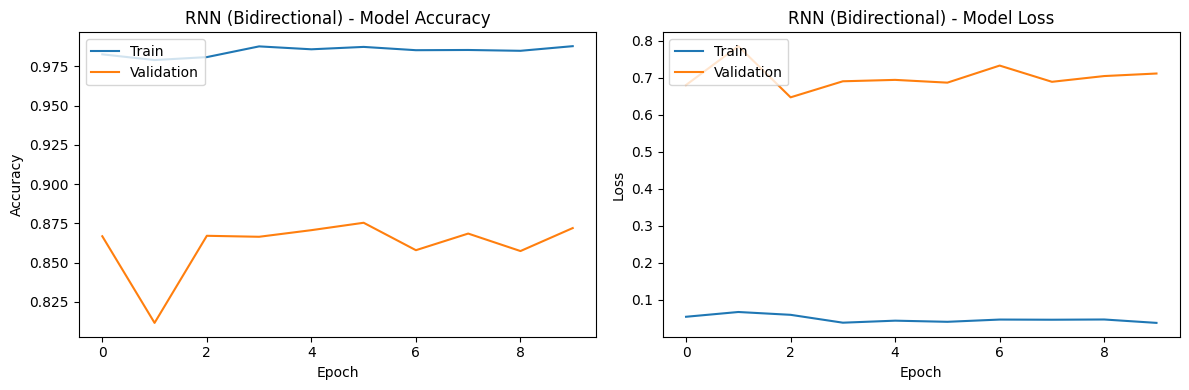

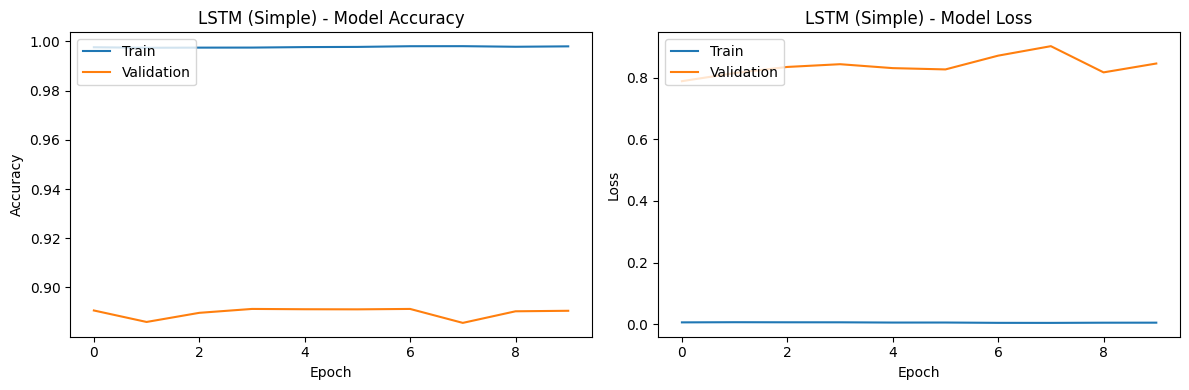

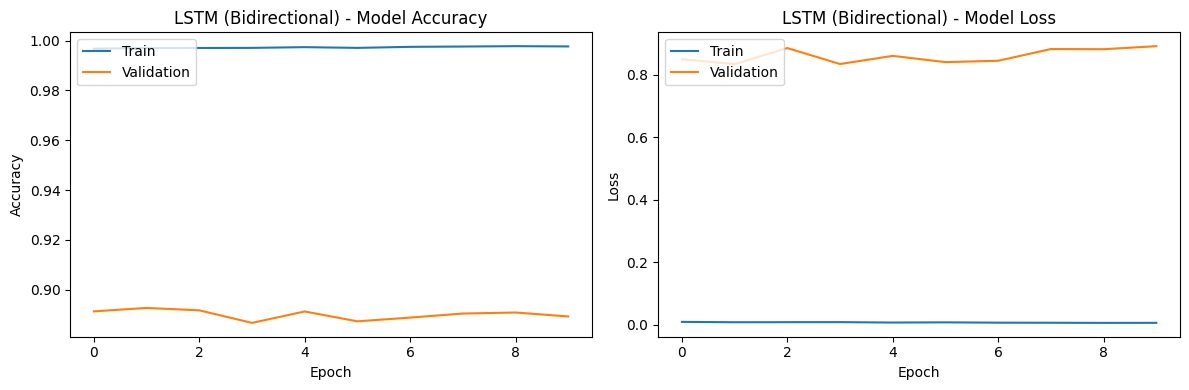

In [ ]:
import matplotlib.pyplot as plt

# Plotting function
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Show plots
    plt.tight_layout()
    plt.show()

# Visualize metrics for each model
models = [
    (model_rnn, 'RNN (Simple)'),
    (model_rnn_bidirectional, 'RNN (Bidirectional)'),
    (model_lstm, 'LSTM (Simple)'),
    (model_lstm_bidirectional, 'LSTM (Bidirectional)')
]

for model, name in models:
    # Train the model and obtain history
    history = model.fit(train_padded, train_labels, epochs=10, batch_size=100, validation_split=0.2, verbose=0)
    # Plot metrics
    plot_metrics(history, name)


# Management Problem. Suppose you are asked by your current employer to develop a conversational agent or chatbot to assist customer support representatives. What advice would you give management about such development? What kinds of methods and models would be needed?  Would this be a substantial development project? Do you have any ideas about the information infrastructure needed to support conversational agents in a production environment?

Developing a conversational agent or chatbot for customer support is a substantial and multifaceted project that requires careful planning, resource allocation, and expertise in various areas of artificial intelligence and natural language processing. Here are some pieces of advice and considerations for management:

1. **Define Clear Objectives:**

Clearly define the chatbot's objectives, limitations, and the specific tasks it will handle. Determine if it will provide general support or specialize in specific areas.

2. **Data Collection and Preprocessing:**

Gather historical customer interactions to train the chatbot effectively. Data preprocessing is crucial for cleaning and structuring the data for training.\

3. **Natural Language Processing (NLP) Techniques:**

Utilize NLP techniques for intent recognition, named entity recognition, sentiment analysis, and language translation, depending on the chatbot's scope.
Implement techniques like tokenization, stemming, and lemmatization to process user input and improve understanding.

4. **Dialog Management:**

Implement a robust dialog management system to handle multi-turn conversations gracefully. Consider using techniques like state machines or reinforcement learning for dialog flow.

5. **Machine Learning Models:**

Consider using machine learning models, such as Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), or Transformer models, for natural language understanding and generation tasks.
Explore pre-trained language models (e.g., GPT, BERT) and fine-tuning them on your specific domain data for improved performance.

6. **User Experience and User Interface (UI/UX):**

Design an intuitive and user-friendly interface for seamless user interactions. Consider incorporating graphical elements, buttons, and quick replies to enhance user experience.
Provide clear instructions on what the chatbot can do and set appropriate user expectations.

7. **Continuous Learning:**

Implement mechanisms for the chatbot to continuously learn from new interactions. Regularly update the training data and retrain the model to adapt to evolving customer queries and language patterns.

8. **Testing and User Feedback:**

Rigorous testing is essential to identify and fix issues. Implement both automated tests and human-in-the-loop evaluations to ensure the chatbot's accuracy and reliability.
Gather user feedback to understand user satisfaction and areas of improvement. Use this feedback to iteratively enhance the chatbot's capabilities.

9. **Security and Privacy:**

Ensure the chatbot complies with data protection regulations (such as GDPR) and follows best practices for user privacy.
Implement security measures to prevent unauthorized access and data breaches.

10. **Scalability and Integration:**

Design the chatbot architecture to be scalable, allowing it to handle a large volume of concurrent users.
Integrate the chatbot with existing systems, databases, and APIs to fetch relevant customer information and provide accurate responses.

11. **Information Infrastructure:**

Deploy the chatbot on a reliable and scalable cloud infrastructure.
Implement monitoring tools to track performance, user interactions, and system health.
Consider implementing a knowledge base system for the chatbot to access relevant information quickly.

**Conclusion:**

Developing an effective customer support chatbot is indeed a substantial project that requires a multidisciplinary approach, involving experts in machine learning, NLP, software engineering, and user experience design. Regular updates, user feedback analysis, and continuous improvement are essential to ensure the chatbot remains valuable and user-friendly over time.






# Think about the possibilities for a generative language model using these same data. That is, drawing on methods described in chapter 8 of the Chollet (2018, pages 271-279), consider how you might develop a software robot to write movie reviews or news articles. Describe what you would do to build such a model.  If time permits, start with a few words and use a language model to generate subsequent words. Try various degrees of randomness (temperature, as described by Chollet) for the generated text sequences.

Building a generative language model for tasks like writing movie reviews or news articles involves creating a text generation system based on recurrent neural networks (RNNs) or transformer architectures. Here's a step-by-step approach to developing such a model:

1. **Data Collection and Preprocessing:**

Gather a large corpus of movie reviews or news articles as the training data.
Preprocess the text data by tokenizing, lowercasing, and removing any special characters or irrelevant information.

2. **Tokenization and Vocabulary Building:**

Tokenize the text into words or subwords.
Build a vocabulary and convert words into numerical tokens. Ensure you have a mapping between words and their corresponding indices.

3. **Architecture Selection:**

Choose an appropriate architecture for your language model. Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), or transformer-based architectures like GPT (Generative Pre-trained Transformer) are popular choices.

4. **Embedding Layer:**

Implement an embedding layer to convert token indices into dense vectors. You can either train embeddings from scratch or use pre-trained word embeddings for this purpose.

5. **Recurrent Layers or Transformer Blocks:**

Stack recurrent layers or transformer blocks to capture sequential dependencies and long-term context in the text.
For transformer-based models, consider using multi-head self-attention mechanisms for better context understanding.

6. **Decoder Output Layer:**

Design a decoder output layer with a softmax activation function. This layer predicts the probability distribution of the next word in the sequence.

7. **Loss Function and Optimization:**

Use categorical cross-entropy loss as the objective function, comparing the predicted word distribution with the actual next word.
Choose an appropriate optimizer (e.g., Adam) and learning rate for training the model.

8. **Training the Model:**

Train the model on the prepared dataset for a sufficient number of epochs. Monitor the loss on a validation dataset to avoid overfitting.
Experiment with different hyperparameters and model architectures to find the best combination.

9. **Text Generation:**

To generate text, start with an initial seed or a few words as input to the model.
Predict the next word probabilities using the trained model.
Use techniques like temperature sampling: Higher temperatures (e.g., 1.0) make the output more diverse and random, while lower temperatures (e.g., 0.2) make the output more focused and deterministic.

10. **Evaluation and Fine-Tuning:**

Evaluate the generated text using human evaluators, automated metrics, or both to ensure coherence, relevance, and fluency.
Fine-tune the model based on the feedback received during the evaluation process.

11. **Deployment and Monitoring:**

Deploy the trained generative model as part of your application or service.
Implement monitoring mechanisms to track the quality of generated content and user feedback. Periodically retrain the model with fresh data to keep it up-to-date.

It's important to note that generative language models require careful tuning and evaluation to produce high-quality and coherent text. Human reviewers and domain experts play a crucial role in ensuring that the generated content meets the desired standards, especially for tasks like writing movie reviews or news articles where the quality of the output is paramount.